In [22]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
  [13f3f980] CairoMakie v0.15.3
  [780c37f4] Carlo v0.2.4
  [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2


In [23]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5

In [24]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:J1, :K, :Lx, :Ly, :Mag, :Energy, :Dx0, :Dy0],
)

cleandata (generic function with 1 method)

In [25]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals)
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel)
    fig = Figure()
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [26]:
jobname = "j1-sweep"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-2.0,0.2,40,40,0.09398±0.00021,-3.73131±0.00056,0.87205±0.00036,0.87598±0.00041
2,-1.9,0.2,40,40,0.3029±0.0016,-3.56722±0.0005,0.85223±0.00032,0.88289±0.00015
3,-1.8,0.2,40,40,0.11142±0.00029,-3.3908±0.00053,0.830198±8.0e-5,0.85685±0.00013
4,-1.7,0.2,40,40,0.08449±0.00057,-3.22361±0.0003,0.78397±0.00028,0.82055±0.00038
5,-1.6,0.2,40,40,0.07172±0.0006,-3.06643±0.00048,0.73608±0.00038,0.76289±0.0002
6,-1.5,0.2,40,40,0.0168±0.0014,-2.93621±0.00089,0.70872±0.00069,0.75899±0.00072
7,-1.4,0.2,40,40,0.05079±0.0008,-2.81252±0.00062,0.61803±0.00075,0.65016±0.00085
8,-1.3,0.2,40,40,0.0339±0.0013,-2.69667±0.00078,0.5706±0.00025,0.63559±0.00026
9,-1.2,0.2,40,40,0.0227±0.00075,-2.5793±0.0015,0.54447±0.0003,0.58034±0.00025


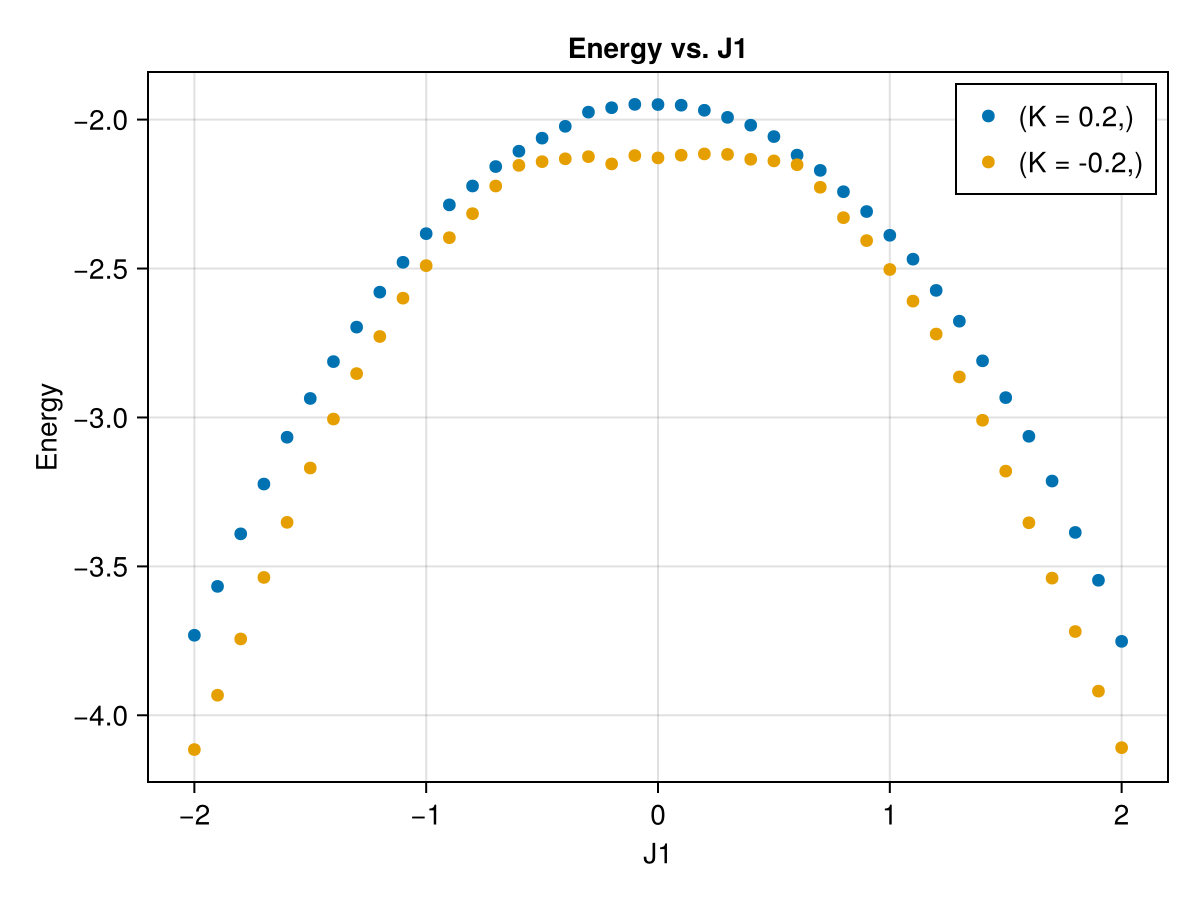

In [27]:
generatePlot(
    data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)

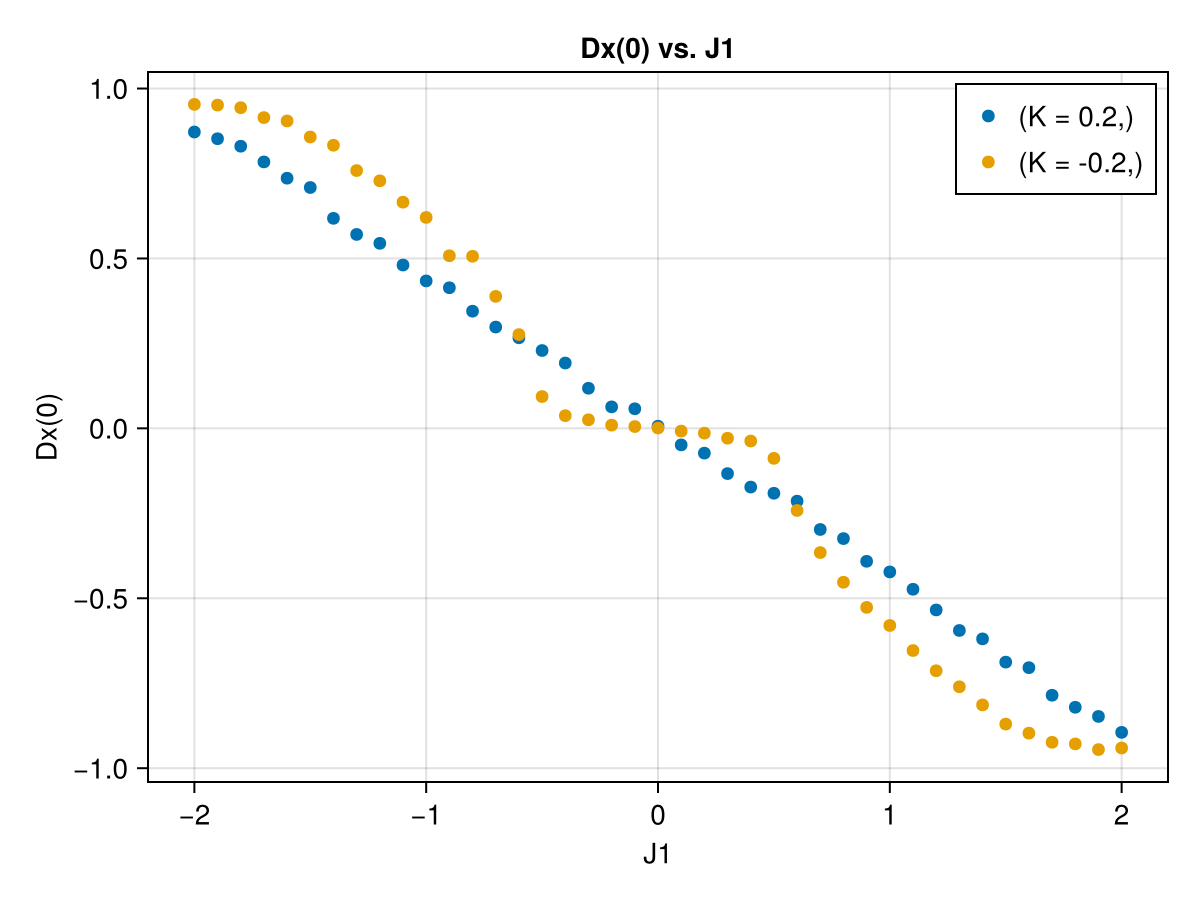

In [28]:
generatePlot(
    data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)

In [29]:
jobname = "j1-fine-sweep"
fine_data = groupby(cleandata("../jobs/" * jobname * ".results.json"), [:K])

Row,J1,K,Lx,Ly,Mag,Energy,Dx0,Dy0
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…
1,-1.0,0.2,40,40,0.00682±0.00028,-2.3838±0.001,0.39219±0.00022,0.4577±0.00024
2,-0.95,0.2,40,40,0.00764±0.00034,-2.33349±0.00071,0.40731±0.00053,0.45117±0.00027
3,-0.9,0.2,40,40,0.00799±0.00053,-2.31558±0.00021,0.3981±0.0003,0.4482±0.00041
4,-0.85,0.2,40,40,0.00824±0.0007,-2.26746±0.00021,0.38896±0.00024,0.41527±0.00013
5,-0.8,0.2,40,40,0.00574±0.00033,-2.23509±0.00019,0.33418±0.00022,0.39088±0.00039
6,-0.75,0.2,40,40,0.00499±0.00047,-2.20023±0.0004,0.32244±0.00018,0.35913±0.00073
7,-0.7,0.2,40,40,0.00656±0.00052,-2.15742±0.00022,0.28805±0.00023,0.33765±0.00021
8,-0.65,0.2,40,40,0.00722±0.00022,-2.1214±0.00029,0.28799±0.00016,0.29831±0.00057
9,-0.6,0.2,40,40,0.00394±0.00027,-2.09096±0.00072,0.23675±0.00022,0.29942±0.00063


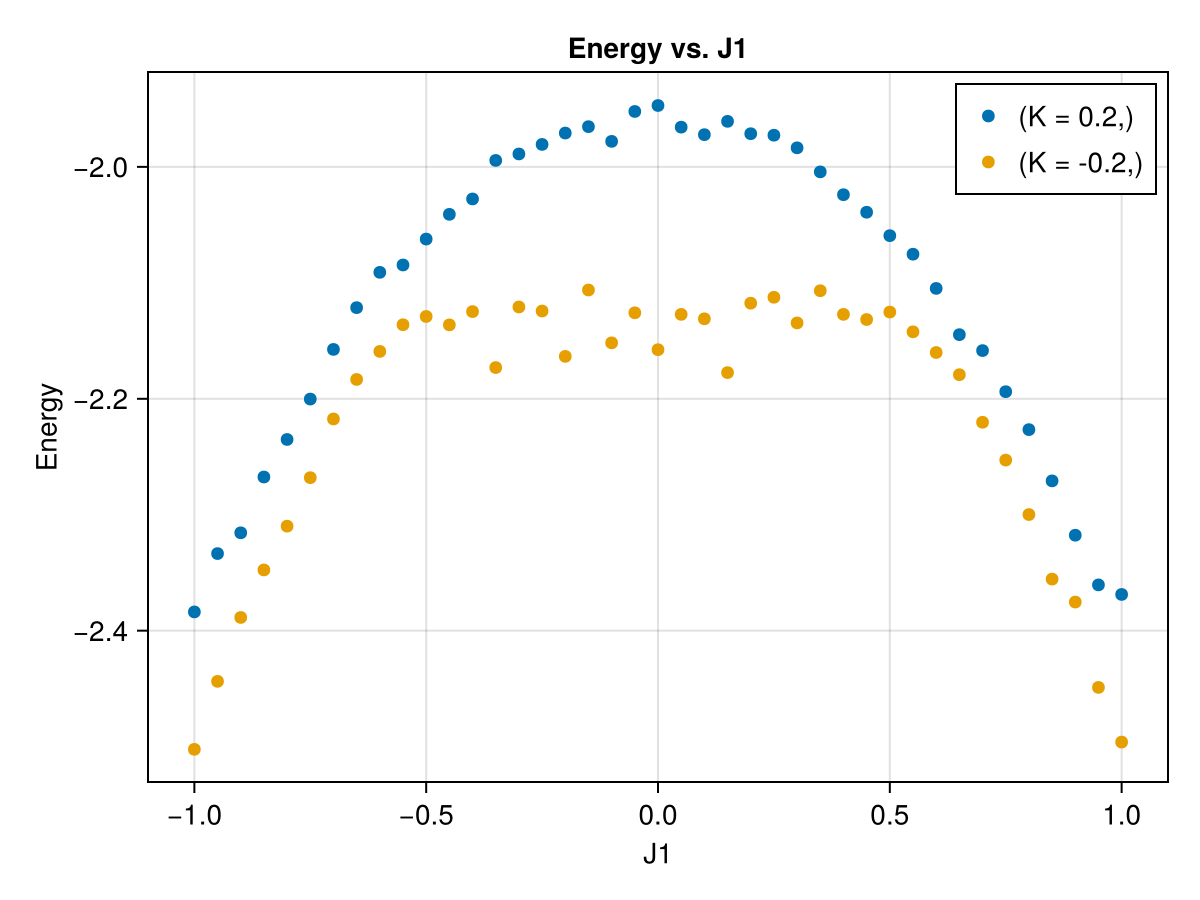

In [30]:
fig = generatePlot(
    fine_data, :J1, :Energy;
    title="Energy vs. J1",
    xlabel="J1",
    ylabel="Energy"
)
save("j1-energy.png", fig)
fig

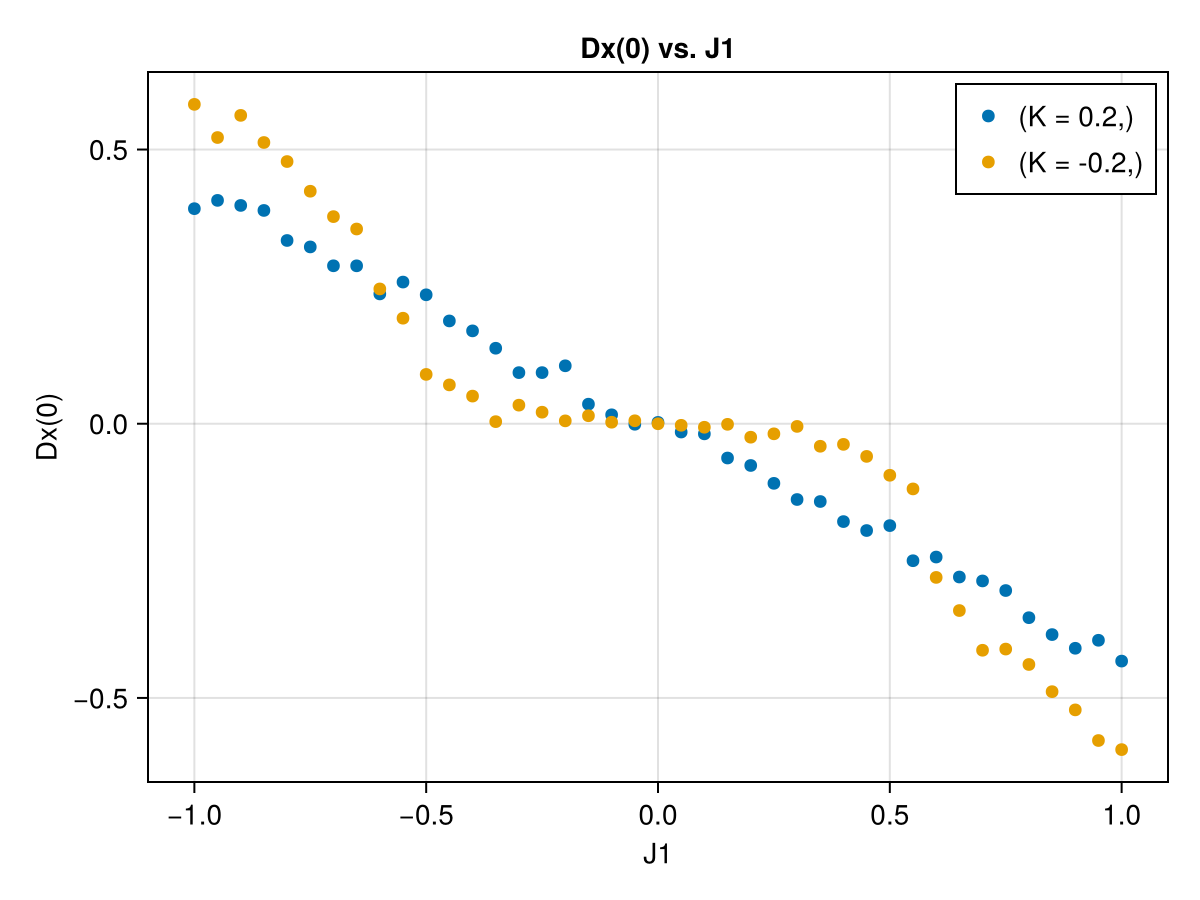

In [31]:
fig = generatePlot(
    fine_data, :J1, :Dx0;
    title="Dx(0) vs. J1",
    xlabel="J1",
    ylabel="Dx(0)"
)
save("j1-Dx0.png", fig)
fig

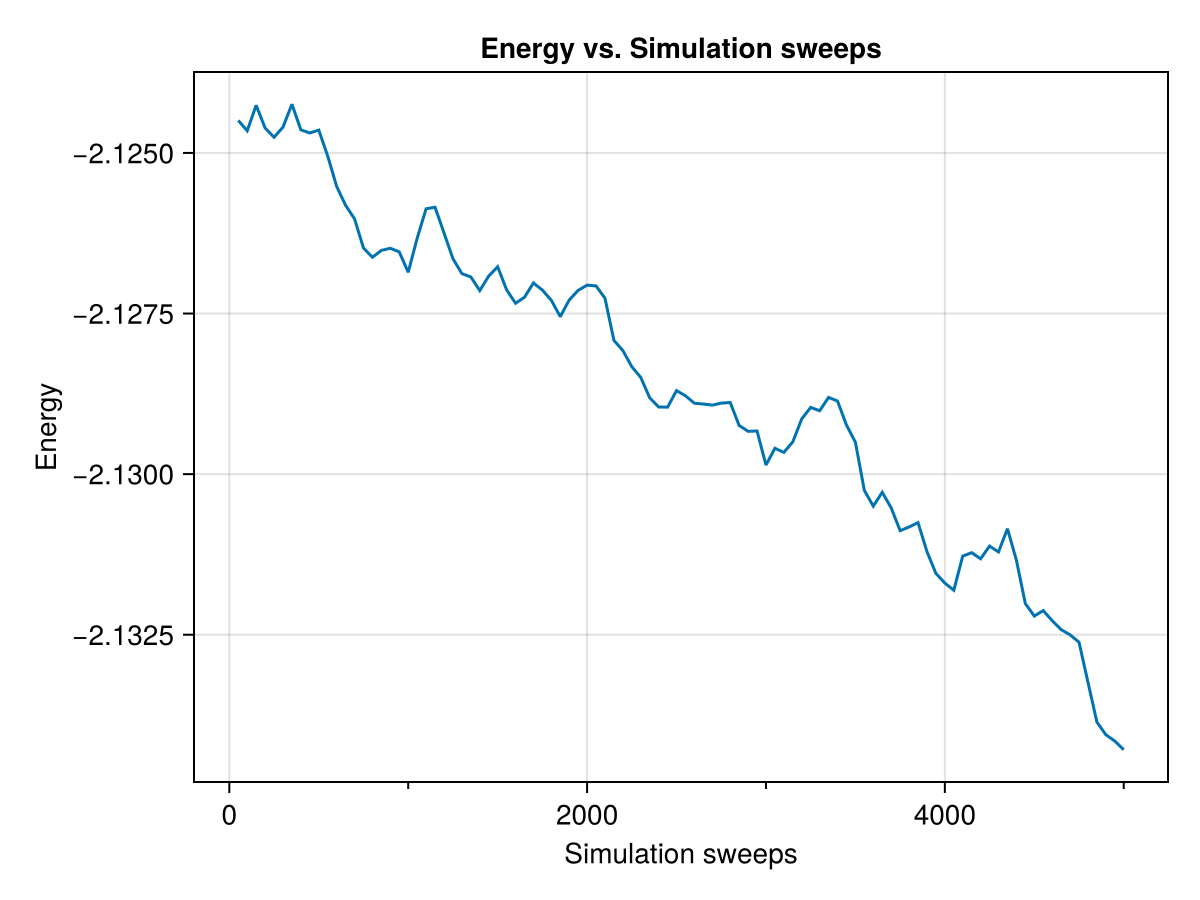

In [33]:
fig = Figure()

ax = fig[1,1] = Axis(
    fig,
    title="Energy vs. Simulation sweeps",
    xlabel="Simulation sweeps",
    ylabel="Energy",
    xminorticksvisible=true
)

task_no = "42"
h5open("../jobs/j1-sweep.data/task00" * task_no * "/run0001.meas.h5") do file
    mag_group = file["observables/Energy"]
    mag_samples = read(mag_group, "samples")
    bin_len = read(mag_group, "bin_length")
    lines!(
        bin_len .* collect(1:length(mag_samples)),
        mag_samples,
        label="T = 2.2435698905536414"
    )
end

fig